# Análise dos Microdados do Exame Nacional do Ensino Médio por Escola

## Importação dos dados

Primeiramente, vamos importar as bibliotecas que serão utilizadas neste notebook.

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Vamos importar agora também o dataset que será analisado, os Microdados do ENEM por escola.

In [2]:
p = 0.01

df = pd.read_csv(
    'MICRODADOS_ENEM_ESCOLA.csv',
    header=0,
    encoding = "ISO-8859-1",
    sep=';',
    dtype={'INSE': 'string'}
)

df

,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,...,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
0,2007,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,144,...,NaN,NaN,69.03,<NA>,NaN,NaN,91.9,8.1,0.0,Maior que 90 alunos
1,2006,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,184,...,NaN,NaN,57.82,<NA>,NaN,NaN,NaN,NaN,NaN,Maior que 90 alunos
2,2005,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,220,...,NaN,NaN,64.83,<NA>,NaN,NaN,86.5,12.4,1.1,Maior que 90 alunos
3,2008,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,186,...,72.16,60.02,NaN,<NA>,NaN,NaN,90.3,9.7,0.0,Maior que 90 alunos
4,2007,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,19,...,NaN,NaN,58.84,<NA>,NaN,NaN,74.2,21.0,4.8,De 1 a 30 alunos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172300,2013,53,DF,5300108,Brasília,53068181,CED 310 DE SANTA MARIA,2,1,213,...,503.86,NaN,NaN,<NA>,91.8,NaN,83.1,9.1,7.8,Maior que 90 alunos
172301,2014,53,DF,5300108,Brasília,53068181,CED 310 DE SANTA MARIA,2,1,138,...,470.20,NaN,NaN,<NA>,72.0,82.00,81.2,17.5,1.3,Maior que 90 alunos
172302,2015,53,DF,5300108,Brasília,53068181,CED 310 DE SANTA MARIA,2,1,198,...,517.24,NaN,NaN,Grupo 3,83.3,76.32,78.9,10.1,11.0,Maior que 90 alunos
172303,2014,53,DF,5300108,Brasília,53082001,COL IMPACTO,4,1,12,...,482.00,NaN,NaN,<NA>,69.2,NaN,91.4,8.6,0.0,De 1 a 30 alunos


## Preparação dos dados

Agora podemos partir para a preparação dos dados. Vamos começar eliminando as colunas que não serão necessárias para este projeto, de modo a facilitar a visualização dos dados.

In [3]:
df = df.drop(columns=['INSE', 'NU_MEDIA_OBJ', 'NU_MEDIA_TOT', 'PC_FORMACAO_DOCENTE', 
                      'NU_TAXA_PERMANENCIA', 'NU_PARTICIPANTES_NEC_ESP', 
                      'CO_UF_ESCOLA', 'NO_MUNICIPIO_ESCOLA', 'CO_ESCOLA_EDUCACENSO', 
                      'NO_ESCOLA_EDUCACENSO', 'NU_MATRICULAS', 'NU_TAXA_APROVACAO', 
                      'NU_TAXA_REPROVACAO', 'NU_TAXA_ABANDONO', 'CO_MUNICIPIO_ESCOLA'])

Agora, vamos checar se há células com valores não informados nas colunas restantes.

In [4]:
df.isnull().sum()/df.shape[0]*100

NU_ANO                        0.000000
SG_UF_ESCOLA                  0.000000
TP_DEPENDENCIA_ADM_ESCOLA     0.000000
TP_LOCALIZACAO_ESCOLA         0.000000
NU_PARTICIPANTES              0.000000
NU_TAXA_PARTICIPACAO         39.243202
NU_MEDIA_CN                  39.243202
NU_MEDIA_CH                  39.243202
NU_MEDIA_LP                  39.243202
NU_MEDIA_MT                  39.243202
NU_MEDIA_RED                 28.353211
PORTE_ESCOLA                  0.000000
dtype: float64

Como pode ser visto, há aproximadamente 40% de células vazias nas colunas das médias das áreas de conhecimento e aproximadamente 30% na coluna da média da redação. Para resolver esse problema, simplesmente eliminaremos as linhas que possuem células vazias.

In [5]:
df = df.dropna()

Agora não há mais nenhuma célula vazia no DataFrame.

In [6]:
df.isnull().sum()/df.shape[0]*100

NU_ANO                       0.0
SG_UF_ESCOLA                 0.0
TP_DEPENDENCIA_ADM_ESCOLA    0.0
TP_LOCALIZACAO_ESCOLA        0.0
NU_PARTICIPANTES             0.0
NU_TAXA_PARTICIPACAO         0.0
NU_MEDIA_CN                  0.0
NU_MEDIA_CH                  0.0
NU_MEDIA_LP                  0.0
NU_MEDIA_MT                  0.0
NU_MEDIA_RED                 0.0
PORTE_ESCOLA                 0.0
dtype: float64

Vamos, a partir dos dados já existentes, criar novos dados agora. Começaremos tirando a média das 5 notas para formar uma média geral.

In [7]:
df['NU_MEDIA_TOTAL'] = (df['NU_MEDIA_CN'] + df['NU_MEDIA_CH'] + df['NU_MEDIA_LP'] +
                        df['NU_MEDIA_MT'] + df['NU_MEDIA_RED'])/5

Também vamos classificar as escolas como sendo parte do 1% com as melhores notas ou não. Para isso, vamos primeiro ordenar o DataFrame em ordem decrescente com base na média total.

In [8]:
df.sort_values(by=['NU_MEDIA_TOTAL'], ascending=False, inplace=True)
df.head()

,NU_ANO,SG_UF_ESCOLA,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,PORTE_ESCOLA,NU_MEDIA_TOTAL
141940,2015,SP,4,1,41,100.00,728.80,721.47,681.23,873.65,813.17,De 31 a 60 alunos,763.664
170995,2014,GO,4,1,36,90.00,731.12,713.91,654.07,841.00,837.78,De 31 a 60 alunos,755.576
83322,2015,CE,4,1,35,100.00,715.13,704.89,663.21,851.45,841.14,De 31 a 60 alunos,755.164
141938,2013,SP,4,1,44,100.00,734.03,738.79,658.29,836.65,804.55,De 31 a 60 alunos,754.462
77207,2015,PI,4,1,124,96.12,699.96,693.19,645.35,832.80,897.42,Maior que 90 alunos,753.744


Agora vamos definir o 1% das escolas com melhores notas. Para isso, criaremos uma nova coluna cujos valores serão True, caso a linha seja uma das 1% primeiras linhas, e False, caso não. Além disso, substituiremos esses valores por 1% e 99% de modo a facilitar a visualização.

In [9]:
df['TP_RANKING'] = df.reset_index().drop(columns='index').index.to_numpy() < int(df.shape[0]*0.01)
df['TP_RANKING'].replace({True:  '1%',
                          False: '99%'}, inplace=True)

In [10]:
df = df.sort_values(by='TP_RANKING')
df.head()

,NU_ANO,SG_UF_ESCOLA,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,PORTE_ESCOLA,NU_MEDIA_TOTAL,TP_RANKING
141940,2015,SP,4,1,41,100.00,728.80,721.47,681.23,873.65,813.17,De 31 a 60 alunos,763.664,1%
79014,2009,PI,4,1,17,73.90,665.02,673.16,654.22,691.02,691.18,De 1 a 30 alunos,674.920,1%
141599,2010,SP,4,1,17,94.40,609.72,682.90,631.12,721.34,729.41,De 1 a 30 alunos,674.898,1%
121420,2011,RJ,4,1,26,86.67,634.07,619.86,612.47,753.37,754.62,De 1 a 30 alunos,674.878,1%
108726,2012,MG,4,1,45,97.83,636.41,659.53,613.70,757.86,706.67,De 31 a 60 alunos,674.834,1%


Devido a imensa quantidade de estados, vamos agrupar as escolas com base na região. Para isso, será aplicada uma função que, a partir da sigla de um estado, retorna a região do mesmo.

In [11]:
def subgrupo(x):
    if any((x =='PE', x =='PB', x =='RN', x =='AL', x =='SE', x =='CE', x =='BA', x =='MA', x =='PI')):
        return 'Nordeste'
    if any((x =='AC', x =='AM', x =='RO', x =='RR', x =='PA', x =='TO', x =='AP')):
        return 'Norte'
    if any((x =='MT', x =='GO', x =='MS', x =='DF')):
        return 'Centro-oeste'
    if any((x =='MG', x =='SP', x =='RJ', x =='ES')):
        return 'Sudeste'
    if any((x =='RS', x =='SC', x =='PR')):
        return 'Sul'

df['REGIAO_ESCOLA'] = df['SG_UF_ESCOLA'].apply(subgrupo)

Para facilitar a compreensão, substituiremos os valores que indicam uma categoria pelo respectivo nome da categoria indicado no dicionário dos microdados.

In [12]:
df['TP_DEPENDENCIA_ADM_ESCOLA'].replace({1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada'}, inplace=True)

In [13]:
df['TP_LOCALIZACAO_ESCOLA'].replace({1: 'Urbana', 2: 'Rural'}, inplace=True)

Desse modo, transformamos nosso dataset original, o qual possuia 172305 linhas e 27 colunas, em um com 104307 linhas e 15 colunas.

In [14]:
df

,NU_ANO,SG_UF_ESCOLA,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,PORTE_ESCOLA,NU_MEDIA_TOTAL,TP_RANKING,REGIAO_ESCOLA
141940,2015,SP,Privada,Urbana,41,100.00,728.80,721.47,681.23,873.65,813.17,De 31 a 60 alunos,763.664,1%,Sudeste
79014,2009,PI,Privada,Urbana,17,73.90,665.02,673.16,654.22,691.02,691.18,De 1 a 30 alunos,674.920,1%,Nordeste
141599,2010,SP,Privada,Urbana,17,94.40,609.72,682.90,631.12,721.34,729.41,De 1 a 30 alunos,674.898,1%,Sudeste
121420,2011,RJ,Privada,Urbana,26,86.67,634.07,619.86,612.47,753.37,754.62,De 1 a 30 alunos,674.878,1%,Sudeste
108726,2012,MG,Privada,Urbana,45,97.83,636.41,659.53,613.70,757.86,706.67,De 31 a 60 alunos,674.834,1%,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149579,2014,PR,Privada,Urbana,13,65.00,521.31,574.26,518.68,529.79,529.23,De 1 a 30 alunos,534.654,99%,Sul
113921,2013,ES,Privada,Urbana,10,83.33,494.39,525.41,528.63,584.84,540.00,De 1 a 30 alunos,534.654,99%,Sudeste
139385,2013,SP,Privada,Urbana,21,60.00,498.85,548.92,526.71,539.74,559.05,De 31 a 60 alunos,534.654,99%,Sudeste
98882,2013,BA,Privada,Urbana,12,85.71,502.47,545.19,528.53,538.63,558.33,De 1 a 30 alunos,534.630,99%,Nordeste


Por fim, puramente para fins estéticos, alteraremos a posição das colunas da média total e do ranking.

In [15]:
colunas = df.columns.tolist()
colunas[-4], colunas[-3] = colunas[-3], colunas[-4]
colunas[-3], colunas[-2] = colunas[-2], colunas[-3]
df = df[colunas]

df

,NU_ANO,SG_UF_ESCOLA,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,NU_MEDIA_TOTAL,TP_RANKING,PORTE_ESCOLA,REGIAO_ESCOLA
141940,2015,SP,Privada,Urbana,41,100.00,728.80,721.47,681.23,873.65,813.17,763.664,1%,De 31 a 60 alunos,Sudeste
79014,2009,PI,Privada,Urbana,17,73.90,665.02,673.16,654.22,691.02,691.18,674.920,1%,De 1 a 30 alunos,Nordeste
141599,2010,SP,Privada,Urbana,17,94.40,609.72,682.90,631.12,721.34,729.41,674.898,1%,De 1 a 30 alunos,Sudeste
121420,2011,RJ,Privada,Urbana,26,86.67,634.07,619.86,612.47,753.37,754.62,674.878,1%,De 1 a 30 alunos,Sudeste
108726,2012,MG,Privada,Urbana,45,97.83,636.41,659.53,613.70,757.86,706.67,674.834,1%,De 31 a 60 alunos,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149579,2014,PR,Privada,Urbana,13,65.00,521.31,574.26,518.68,529.79,529.23,534.654,99%,De 1 a 30 alunos,Sul
113921,2013,ES,Privada,Urbana,10,83.33,494.39,525.41,528.63,584.84,540.00,534.654,99%,De 1 a 30 alunos,Sudeste
139385,2013,SP,Privada,Urbana,21,60.00,498.85,548.92,526.71,539.74,559.05,534.654,99%,De 31 a 60 alunos,Sudeste
98882,2013,BA,Privada,Urbana,12,85.71,502.47,545.19,528.53,538.63,558.33,534.630,99%,De 1 a 30 alunos,Nordeste


## Análise e visualização dos dados

Terminada a preparação dos dados, finalmente podemos começar a etapa de visualização dos mesmos. Primeiramente, vamos escolher o estilo e a paleta de cores em que serão plotados os gráficos. 

In [16]:
sns.set_style('whitegrid')
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#f5c740"]
sns.set_palette(flatui)

Agora, realmente partindo para análise, vamos começar analisando a distribuição das médias totais de acordo com o porte da escola.

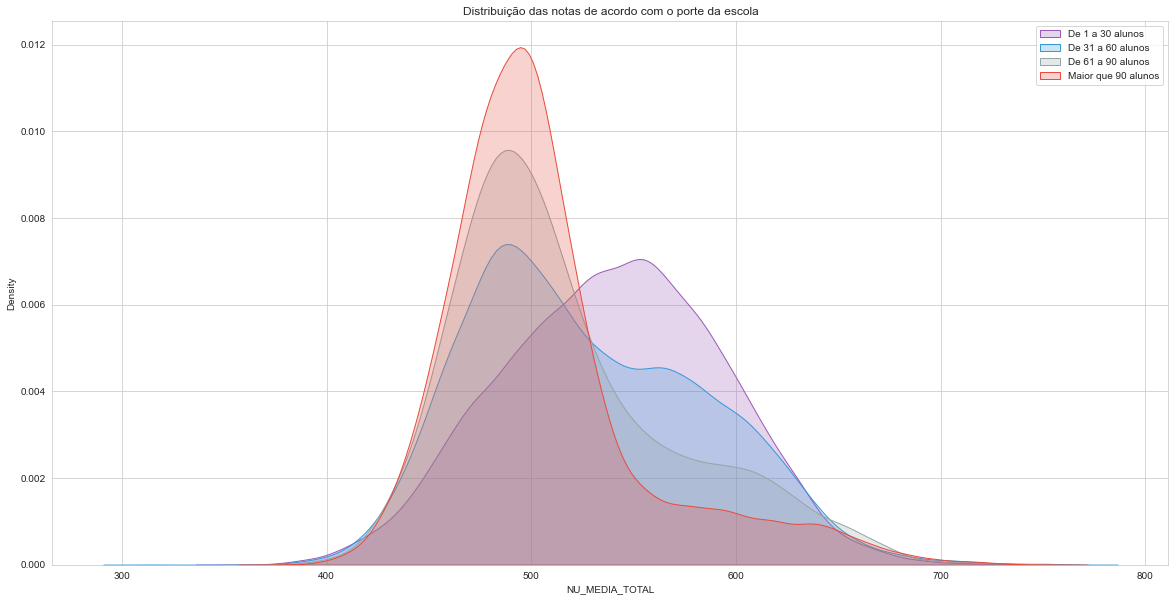

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.kdeplot(df.query("PORTE_ESCOLA == 'De 1 a 30 alunos'")['NU_MEDIA_TOTAL'], ax=ax, shade=True, label='De 1 a 30 alunos') 
sns.kdeplot(df.query("PORTE_ESCOLA == 'De 31 a 60 alunos'")['NU_MEDIA_TOTAL'], ax=ax, shade=True, label='De 31 a 60 alunos')
sns.kdeplot(df.query("PORTE_ESCOLA == 'De 61 a 90 alunos'")['NU_MEDIA_TOTAL'], ax=ax, shade=True, label='De 61 a 90 alunos') 
sns.kdeplot(df.query("PORTE_ESCOLA == 'Maior que 90 alunos'")['NU_MEDIA_TOTAL'], ax=ax, shade=True, label='Maior que 90 alunos') 
ax.set_title('Distribuição das notas de acordo com o porte da escola') # coloca titulo
ax.legend()
plt.show()

Como pode ser visto no gráfico, escolas com um porte muito elevado possuem uma grande concentração das notas na faixa dos 500 pontos, enquanto escolas com menor porte, com 1 a 30 alunos, tendem a possuir notas maiores e mais distribuidas.

Vamos analisar agora o mesmo caso das notas, mas levando em conta agora o tipo de dependência admnistrativa da escola.

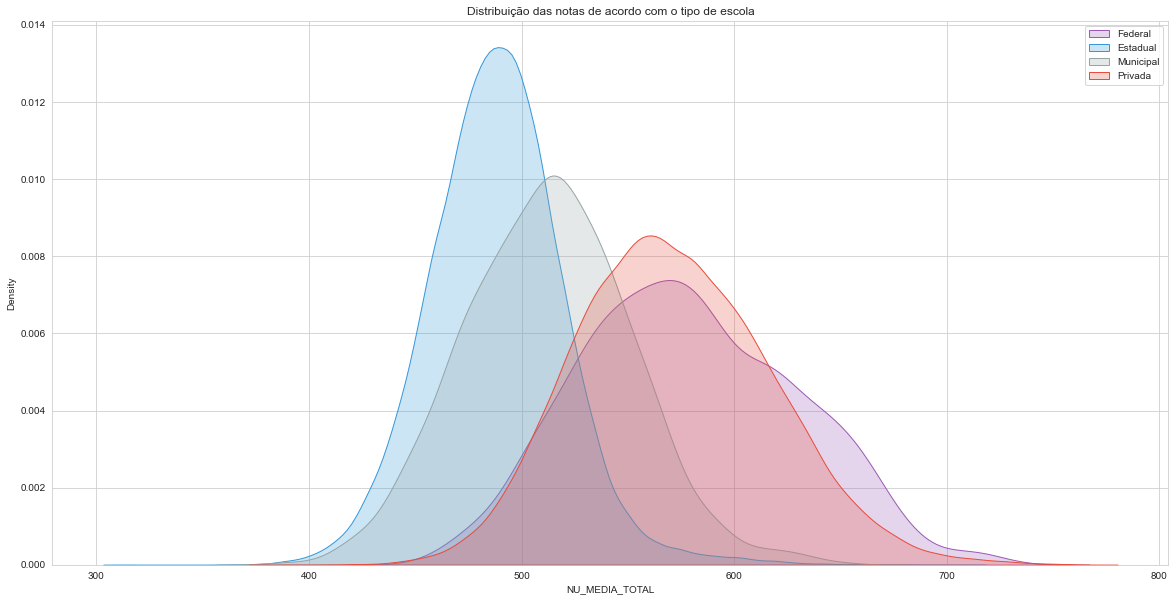

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.kdeplot(df.query("TP_DEPENDENCIA_ADM_ESCOLA == 'Federal'")['NU_MEDIA_TOTAL'], ax=ax, shade=True, label='Federal') 
sns.kdeplot(df.query("TP_DEPENDENCIA_ADM_ESCOLA == 'Estadual'")['NU_MEDIA_TOTAL'], ax=ax, shade=True, label='Estadual')
sns.kdeplot(df.query("TP_DEPENDENCIA_ADM_ESCOLA == 'Municipal'")['NU_MEDIA_TOTAL'], ax=ax, shade=True, label='Municipal') 
sns.kdeplot(df.query("TP_DEPENDENCIA_ADM_ESCOLA == 'Privada'")['NU_MEDIA_TOTAL'], ax=ax, shade=True, label='Privada') 
ax.set_title('Distribuição das notas de acordo com o tipo de escola') # coloca titulo
ax.legend()
plt.show()

Analisando o gráfico, podemos facilmente perceber que, nas escolas federais e privadas, as médias totais tendem a se concentrar entre 550 a 600 pontos e chegam ultrapassar a marca dos 700 pontos, enquanto nas escolas estaduais e municipais há uma concentração na faixa dos 450 a 500 pontos, com poucas passando dos 600 pontos e praticamente nenhuma ultrapassando a marca dos 700.

Vamos checar agora se este padrão se aplica em todas as áreas de conhecimento.

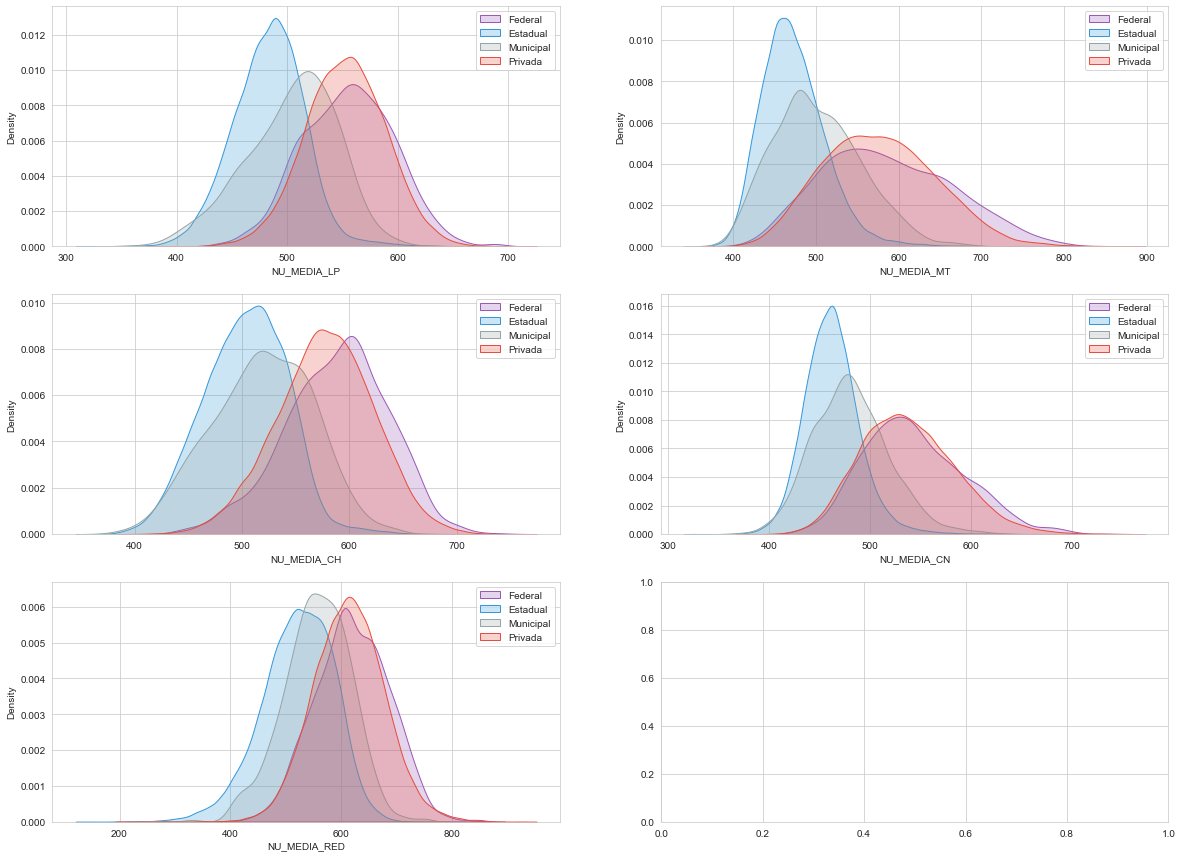

In [21]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
for i, area in enumerate(['NU_MEDIA_LP', 'NU_MEDIA_MT', 'NU_MEDIA_CH', 'NU_MEDIA_CN', 'NU_MEDIA_RED']):
    sns.kdeplot(df.query("TP_DEPENDENCIA_ADM_ESCOLA == 'Federal'")[area], ax=ax[i//2, i%2], shade=True, label='Federal') 
    sns.kdeplot(df.query("TP_DEPENDENCIA_ADM_ESCOLA == 'Estadual'")[area], ax=ax[i//2, i%2], shade=True, label='Estadual')
    sns.kdeplot(df.query("TP_DEPENDENCIA_ADM_ESCOLA == 'Municipal'")[area], ax=ax[i//2, i%2], shade=True, label='Municipal') 
    sns.kdeplot(df.query("TP_DEPENDENCIA_ADM_ESCOLA == 'Privada'")[area], ax=ax[i//2, i%2], shade=True, label='Privada')  
    ax[i//2, i%2].legend()
plt.show()

Observando as áreas de conhecimento separadamente, vemos que o padrão continua o mesmo, com escolas federais e privadas possuindo uma concentração em notas maiores e alcançando maiores pontos que as escolas das municipais e estaduais, especialmente na área de Matemática e suas Tecnologias, e que as notas das redes estaduais e municipais tendem a ser um pouco maiores nas áreas de Ciências Humanas e suas Tecnologias e Redação.

Analisaremos agora como se dá a distrubuição da taxa de participação das escolas, a taxa de participação é o número total de participantes no ENEM da escola dividido pelo número de matriculados nos anos finais do Ensino Médio da escola.

Vamos começar analisando com base no tipo de dependência administrativa da escola.

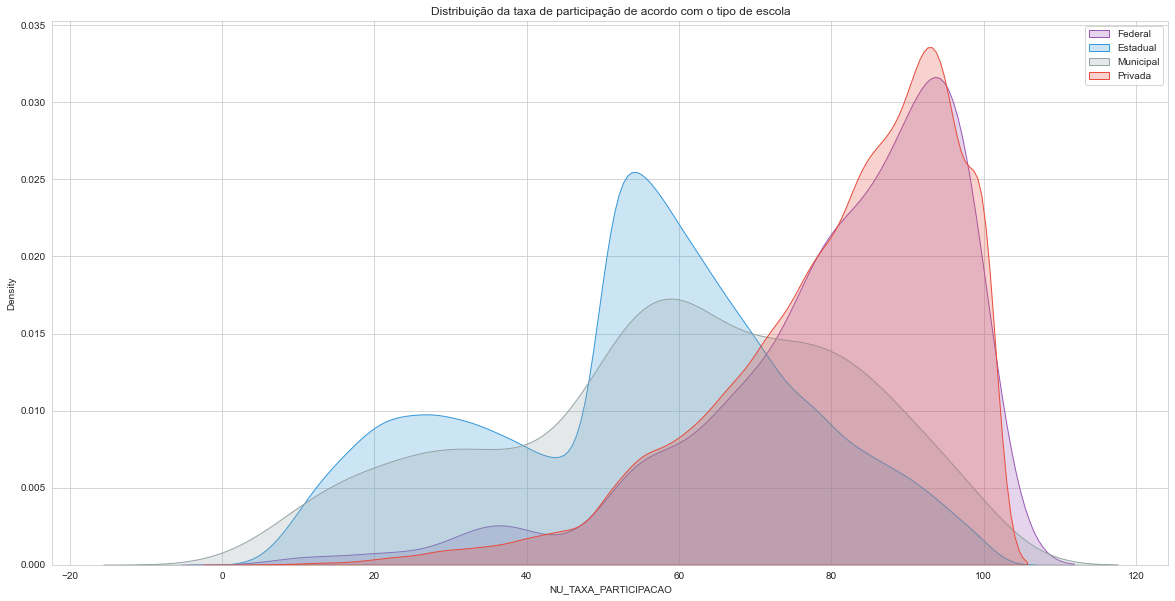

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.kdeplot(df.query("TP_DEPENDENCIA_ADM_ESCOLA == 'Federal'")['NU_TAXA_PARTICIPACAO'], ax=ax, shade=True, label='Federal') 
sns.kdeplot(df.query("TP_DEPENDENCIA_ADM_ESCOLA == 'Estadual'")['NU_TAXA_PARTICIPACAO'], ax=ax, shade=True, label='Estadual')
sns.kdeplot(df.query("TP_DEPENDENCIA_ADM_ESCOLA == 'Municipal'")['NU_TAXA_PARTICIPACAO'], ax=ax, shade=True, label='Municipal') 
sns.kdeplot(df.query("TP_DEPENDENCIA_ADM_ESCOLA == 'Privada'")['NU_TAXA_PARTICIPACAO'], ax=ax, shade=True, label='Privada') 
ax.set_title('Distribuição da taxa de participação de acordo com o tipo de escola') # coloca titulo
ax.legend()
plt.show()

Através do gráfico, podemos notar que, em escolas federais e privadas, geralmente há uma enorme taxa de participação no ENEM por parte dos alunos, enquanto em escolas municipais e estaduais a taxa de participação é bem mais variada.

Um fator interessante de se analisar é se há uma maior adesão dos estudantes ao ENEM com o passar dos anos. Para isso, plotaremos um gráfico com a taxa média de participação por tipo de escola desde 2009 a 2015.

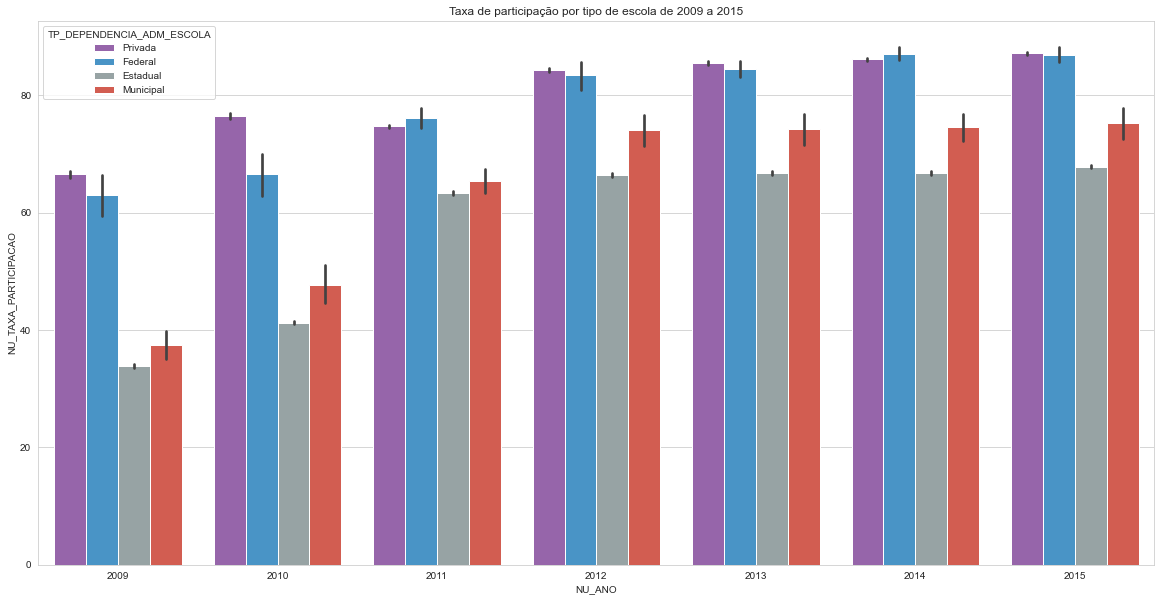

In [23]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=df, x='NU_ANO', y='NU_TAXA_PARTICIPACAO', hue='TP_DEPENDENCIA_ADM_ESCOLA')
ax.set_title('Taxa de participação por tipo de escola de 2009 a 2015')
plt.show()

Podemos ver que entre 2009 a 2015, houve um aumento da taxa de participação em todos os tipos de escola, sobretudo nas estaduais e municipais. Além disso, as escolas federais e privadas sempre tiveram uma taxa de participação maior que as outras duas.

Agora, vamos analisar como se dá a distribuição de participantes no ENEM dependendo do tipo de dependência administrativa das escolas.

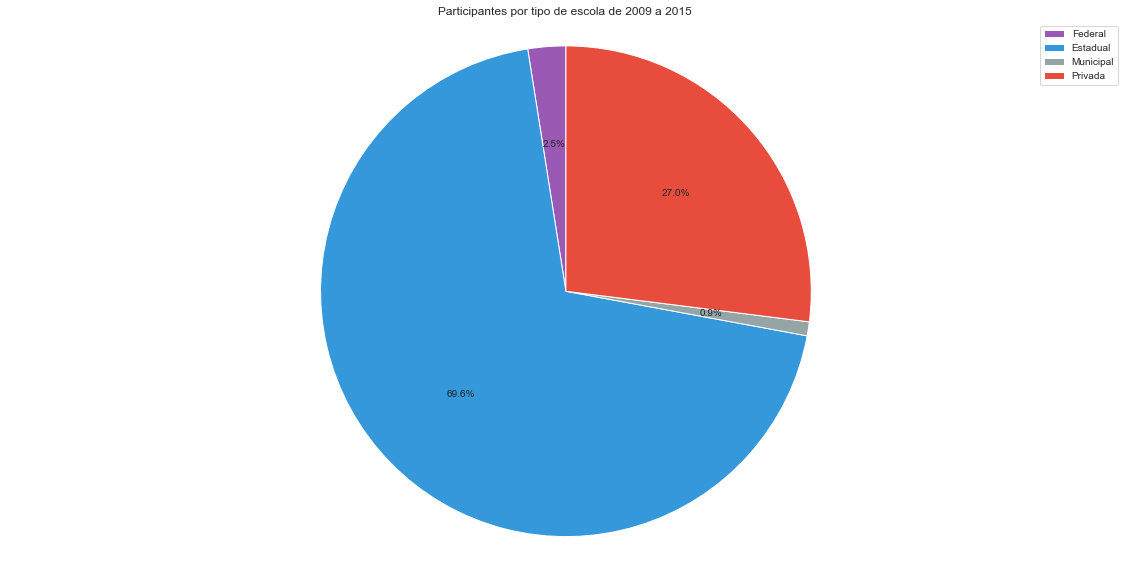

In [24]:
sizes = []
labels = ['Federal', 'Estadual', 'Municipal', 'Privada']
for i in labels:
    sizes.append(df.query(f"TP_DEPENDENCIA_ADM_ESCOLA == '{i}'")['NU_PARTICIPANTES'].sum())

fig, ax = plt.subplots(figsize=(20, 10))
ax.pie(x=sizes, labels=labels, startangle=90, labeldistance=None, autopct='%1.1f%%')
ax.set_title('Participantes por tipo de escola de 2009 a 2015')
ax.axis('equal')
ax.legend()
plt.show()

Com base nesse gráfico e no anterior, podemos ver que, apesar das escolas da rede estadual possuírem uma taxa de participação menor que a das redes federais e privadas, a quantidade de participantes das mesmas corresponde a mais de um terço do total.

Por fim, vamos analisar como se dá a distribuição das escolas com as melhores notas com base em seu tipo de dependência admnistrativa, seu tipo de localização e sua região. Para isso, criaremos uma função que gera um gráfico de barras empilhadas para podermos comparar as escolas com as 1% melhores notas e as restantes.

In [25]:
def compare_distribution(column, chart_title, legend_title):
    fig, ax = plt.subplots(figsize=(15, 3)) 
    # Define o título do gráfico e cria o gráfico
    ax.set_title(chart_title) 
    sns.histplot(df, y="TP_RANKING", hue=column, stat="probability", multiple="fill", shrink=0.8, ax=ax, edgecolor="none")
    
    # Remove as linhas dos eixos
    sns.despine(left=True, bottom=True)
    
    # Remove o titulo do eixo vertical e define o do eixo horizontal
    ax.set_ylabel('') 
    ax.set_xlabel('Proporção') 
    
    # Muda a legenda de posição
    legends = re.findall(r"'(.*?)'", str(list(ax.get_legend().get_texts())))
    legends.reverse()
    plt.legend(legends, title=legend_title,bbox_to_anchor=(0.5,-0.2), loc='upper center', ncol=3)
    plt.show()

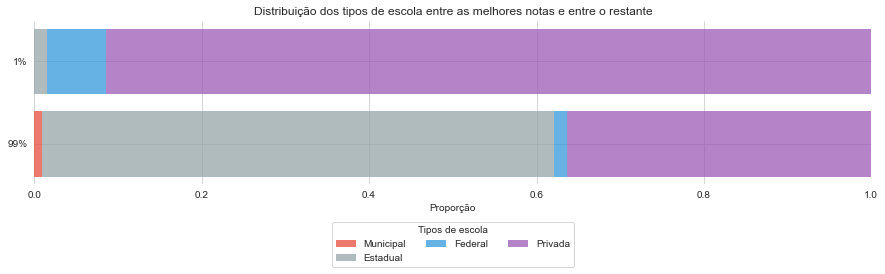

In [26]:
compare_distribution('TP_DEPENDENCIA_ADM_ESCOLA', 'Distribuição dos tipos de escola entre as melhores notas e entre o restante', 'Tipos de escola')

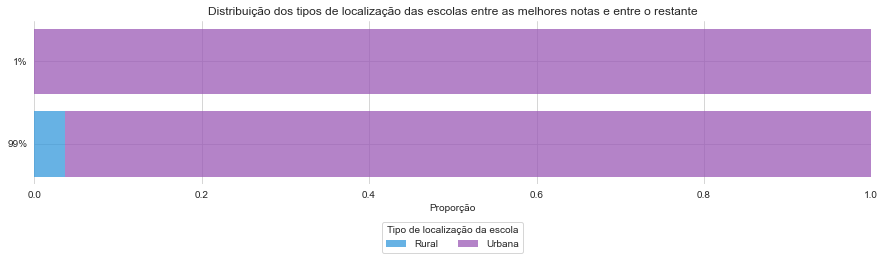

In [27]:
compare_distribution('TP_LOCALIZACAO_ESCOLA', 'Distribuição dos tipos de localização das escolas entre as melhores notas e entre o restante', 'Tipo de localização da escola')

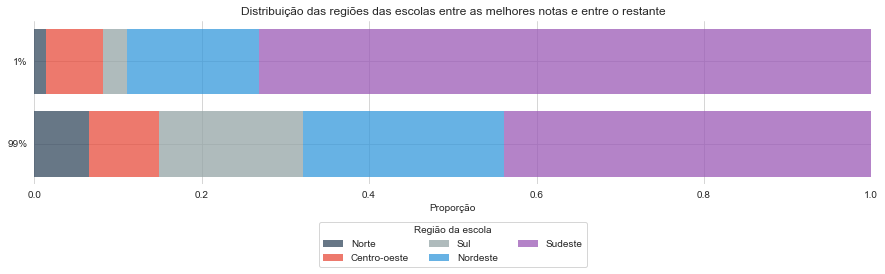

In [28]:
compare_distribution('REGIAO_ESCOLA', 'Distribuição das regiões das escolas entre as melhores notas e entre o restante', 'Região da escola')

Como podemos ver a partir desses três gráficos, a grande maioria das escolas com melhores notas fazem parte da esfera privada, enquanto as escolas da rede estadual compoem a maioria do grupo geral.
Além disso, podemos observar que não há escolas localizadas na zona rural entre os 1% e que a maioria das escolas com melhores notas são da região sudeste do país.